In [ ]:
import sys
import numpy as np
import cv2
import io
import matplotlib.pylab as plt

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")   

# 1. 숫자인식

In [2]:
#mouse drawing function
oldx, oldy = -1, -1
def on_mouse(event, x, y, flags, _):
    global oldx, oldy

    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        oldx, oldy = -1, -1

    elif event == cv2.EVENT_MOUSEMOVE:#when mouse move draw lines
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (255, 255, 255), 40, cv2.LINE_AA)
            oldx, oldy = x, y
            cv2.imshow('img', img)


net = cv2.dnn.readNet('mnist_cnn.pb')#pretrained weights

if net.empty():
    print('Network load failed!')
    sys.exit()
    

img = np.zeros((400, 400), np.uint8)#image sixe is 400x400 of black(0 pixels)

cv2.imshow('img', img)#show image
cv2.setMouseCallback('img', on_mouse)#draw on that image using mouse

while True:
    c = cv2.waitKey()

    if c == 27:#Esc Key
        break
    elif c == ord(' '):#space key
        blob = cv2.dnn.blobFromImage(img, 1/255., (28, 28))#creating blob and give it size of 28x28 due to image sizein MNIST is 28x28 
        net.setInput(blob)#input blob in network
        prob = net.forward()#predicted
        print(prob) #probabilities of each digits

        _, maxVal, _, maxLoc = cv2.minMaxLoc(prob)#finding the digits with the highest probability and its location
        #print(maxVal, maxLoc)
        digit = maxLoc[0]#location

        print('%d (%f)' % (digit, maxVal * 100)) #location and confidence

        img.fill(0)
        cv2.imshow('img', img)

cv2.destroyAllWindows()

[[2.9991976e-10 1.3949411e-08 1.9160681e-15 8.3635182e-12 1.6659698e-02
  9.4592792e-07 9.8128980e-01 2.0494445e-03 4.4276216e-08 9.2733953e-14]]
6 (98.128980)
[[1.0259476e-02 7.3406567e-12 1.2685943e-10 2.1855712e-07 1.4620111e-05
  8.7132692e-09 2.3075046e-04 1.0389370e-11 2.7984333e-06 9.8949218e-01]]
9 (98.949218)
[[3.4537752e-08 7.1612227e-04 6.7481456e-06 1.5368470e-03 3.4779790e-01
  2.7203893e-02 7.9427339e-04 1.0170029e-03 6.2092626e-01 8.7305307e-07]]
8 (62.092626)
[[7.4581258e-10 1.9480130e-03 5.8181195e-06 2.0134026e-05 4.4730503e-05
  1.0222384e-04 8.5070466e-12 9.9786359e-01 5.0793797e-06 1.0334292e-05]]
7 (99.786359)
[[2.9372193e-15 9.7206030e-09 3.2588966e-12 7.0333568e-05 1.8908089e-12
  2.8519598e-11 1.8194288e-11 9.9992967e-01 9.8924113e-10 4.7420689e-18]]
7 (99.992967)
[[6.8027066e-14 7.6671629e-12 5.9872707e-09 9.9999976e-01 1.2596619e-13
  4.3282787e-11 1.9581813e-07 5.2747520e-14 3.6722951e-12 4.7931897e-14]]
3 (99.999976)
[[1.00102344e-21 7.82951655e-12 3.600509

# 2. 한글인식

In [ ]:
labels_file = io.open("label.txt", 'r', encoding='utf-8').read().splitlines()#contains labels of korean alphabets(980):classes
print(labels_file[2])

In [ ]:
oldx, oldy = -1, -1

def on_mouse(event, x, y, flags, _):
    global oldx, oldy

    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        oldx, oldy = -1, -1

    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (0, 0, 0), 40, cv2.LINE_AA)
            oldx, oldy = x, y
            cv2.imshow('img', img)


net = cv2.dnn.readNet('frozen_graph.pb')#model to detect korean characters


if net.empty():
    print('Network load failed!')
    sys.exit()

img = np.ones((400, 400), np.uint8) * 255 #white image

cv2.imshow('img', img)
cv2.setMouseCallback('img', on_mouse)

while True:
    c = cv2.waitKey()

    if c == 27:
        break
    elif c == ord(' '):
        blob = cv2.dnn.blobFromImage(img, 1/255., (32, 32))#give it size of 32x32
        net.setInput(blob)
        prob = net.forward()

       
        alphabet = np.argmax(prob)
        print(alphabet)#location
        
        
        print(labels_file[alphabet], np.max(prob) * 100) #alphabet and probability

        img.fill(255)
        cv2.imshow('img', img)
        print(prob)
        

cv2.destroyAllWindows()

# 3. 영상인식

In [77]:
# http://dl.caffe.berkeleyvision.org/bvlc_googlenet.caffemodel


filename1 = 'scooter.jpg'
filename = 'cup.jpg'
filename = 'beagle.jpg'
filename = 'pineapple.jpg'
filename = 'space_shuttle.jpg'

img = cv2.imread(filename1)

if img is None:
    print('Image load failed!')
    sys.exit()

# Load network

net = cv2.dnn.readNet('bvlc_googlenet.caffemodel', 'deploy_c.prototxt') #weights file,config file

if net.empty():
    print('Network load failed!')
    sys.exit()

# Load class names

classNames = None
with open('classification_classes_ILSVRC2012.txt', 'rt') as f:
    classNames = f.read().rstrip('\n').split('\n')#class names in GoogleNet(1000)
    
#classNames[999]

'toilet tissue, toilet paper, bathroom tissue'

In [78]:
# Inference

inputBlob = cv2.dnn.blobFromImage(img, 1, (224, 224), (104, 117, 123))#size of 224x224 #104,117,123 #mean
net.setInput(inputBlob, 'data')
prob = net.forward()
#print(prob)
#print(len(prob[0])) 1000

In [79]:
# Check results & Display

out = prob.flatten()# flatten function change it into 1D-array
#print(out)
classId = np.argmax(out)  #np.argmax() function returns indices of the max element of the array in a particular axis.
confidence = out[classId] 

motor scooter, scooter (59.21%)


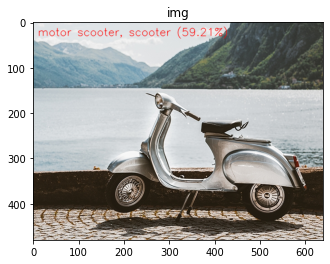

In [80]:
str = '%s (%4.2f%%)' % (classNames[classId], confidence * 100)
cv2.putText(img, str, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 1, cv2.LINE_AA)
print(str)
imshow('img', img)

# 4. 얼굴검출

In [148]:
# https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20180205_fp16/res10_300x300_ssd_iter_140000_fp16.caffemodel
# https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20180220_uint8/opencv_face_detector_uint8.pb


#model = 'res10_300x300_ssd_iter_140000_fp16.caffemodel' #model
#config = 'deploy.prototxt' #config

model = 'opencv_face_detector_uint8.pb'
config = 'opencv_face_detector.pbtxt'

net = cv2.dnn.readNet(model, config)


if net.empty():
    print('Net open failed!')
    sys.exit()

frame = cv2.imread('kids.png');

blob = cv2.dnn.blobFromImage(frame, 1, (300, 300), (104, 177, 123))# image size is 300x300
net.setInput(blob)
detect = net.forward()
print(detect.shape)#4-D, 200 objects detected

(1, 1, 200, 7)


In [149]:
detect[0,0,0, :]#object,confidence,rect coordinates(1x1)

array([0.        , 1.        , 0.9998311 , 0.7169277 , 0.30630535,
       0.86466104, 0.5671694 ], dtype=float32)

In [150]:
(h, w) = frame.shape[:2]#height and width from orginal image
detect = detect[0, 0, :, :]# 200,7 meaningfull ones
print(detect.shape)#itt can detect 200 different classes at once

(200, 7)


2
Face: 0.995


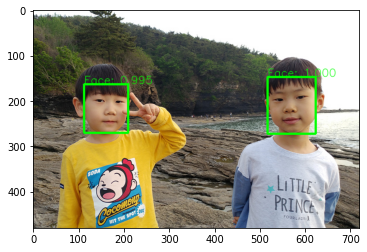

In [151]:
cnt = 0
for i in range(detect.shape[0]):
    confidence = detect[i, 2]#in detect, index 2 holds confidence
    if confidence < 0.5: continue
    cnt = cnt + 1#face counting
    x1 = int(detect[i, 3] * w)#they are normalized, to match them to orginal image we multiply w.h from orginal image
    y1 = int(detect[i, 4] * h)
    x2 = int(detect[i, 5] * w)
    y2 = int(detect[i, 6] * h)

    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 4)

    label = 'Face: %4.3f' % confidence
    cv2.putText(frame, label, (x1, y1 - 1), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 1, cv2.LINE_AA)
print(cnt)
print(label)
imshow("", frame)

In [147]:
# https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20180205_fp16/res10_300x300_ssd_iter_140000_fp16.caffemodel
# https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20180220_uint8/opencv_face_detector_uint8.pb


#model = 'res10_300x300_ssd_iter_140000_fp16.caffemodel'
#config = 'deploy.prototxt'

model = 'opencv_face_detector_uint8.pb'
config = 'opencv_face_detector.pbtxt'

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('Camera open failed!')
    sys.exit()

net = cv2.dnn.readNet(model, config)

if net.empty():
    print('Net open failed!')
    sys.exit()

while True:
    _, frame = cap.read()
    if frame is None:
        break        
    
    blob = cv2.dnn.blobFromImage(frame, 1, (300, 300), (104, 177, 123))#104,177,123 zero_mean of RGB
    net.setInput(blob)
    detect = net.forward()
    
    (h, w) = frame.shape[:2]
    detect = detect[0, 0, :, :]

    for i in range(detect.shape[0]):
        confidence = detect[i, 2]
        if confidence < 0.5: continue
        cnt = cnt + 1

        x1 = int(detect[i, 3] * w)
        y1 = int(detect[i, 4] * h)
        x2 = int(detect[i, 5] * w)
        y2 = int(detect[i, 6] * h)

        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0))

        label = 'Face: %4.3f' % confidence
        cv2.putText(frame, label, (x1, y1 - 1), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 1, cv2.LINE_AA)
    cv2.imshow('frame', frame)

    if cv2.waitKey(1) == 27:
        break
cv2.destroyAllWindows()

# 5. 객체 검출

In [5]:
classNames = { 0: 'background',
    1: 'aeroplane', 2: 'bicycle', 3: 'bird', 4: 'boat',
    5: 'bottle', 6: 'bus', 7: 'car', 8: 'cat', 9: 'chair',
    10: 'cow', 11: 'diningtable', 12: 'dog', 13: 'horse',
    14: 'motorbike', 15: 'person', 16: 'pottedplant',
    17: 'sheep', 18: 'sofa', 19: 'train', 20: 'tvmonitor' }#it can detect 20 different classes

weight = 'MobileNetSSD_deploy.caffemodel'
config = 'MobileNetSSD_deploy.prototxt'

net = cv2.dnn.readNetFromCaffe(config, weight)

In [6]:
frame = cv2.imread('img.jpeg');

blob = cv2.dnn.blobFromImage(frame, 0.007843, (300, 300), (127.5, 127.5, 127.5), False)#0.007843 scale factor #300,300 image size
net.setInput(blob)                                            #mean

detections = net.forward()


detect = detections[0,0,:,:]

print(detections.shape)#it can detects 100 bounding boxes

(1, 1, 100, 7)


person 84.37252044677734
person 76.61179900169373
person 61.06683015823364
person 58.49577188491821
person 57.260000705718994
person 52.282387018203735
tvmonitor 39.787837862968445
person 26.6811341047287
person 25.225183367729187
8


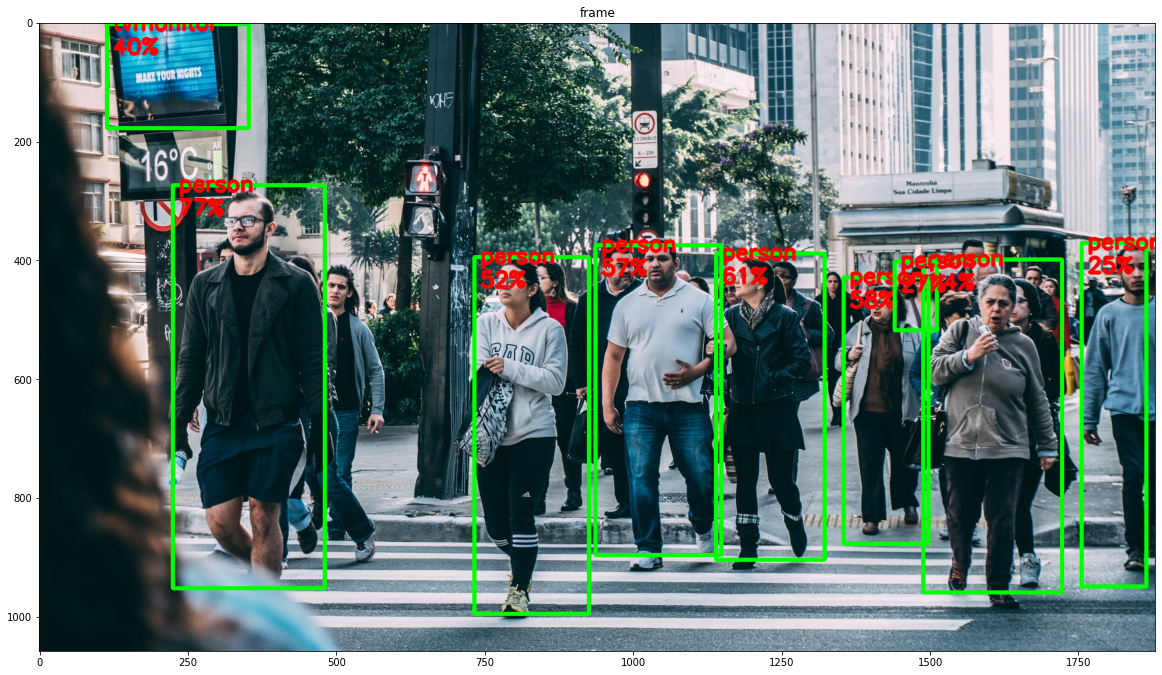

In [17]:
(h, w) = frame.shape[:2]#h,w from orginal image

cnt=0#person counting
for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]*100 #Confidence of prediction 
        if confidence > 10: # Filter prediction 
            class_id = int(detections[0, 0, i, 1]) # Class label
            
            x1 = int(detect[i, 3] * w)
            y1 = int(detect[i, 4] * h)
            x2 = int(detect[i, 5] * w)
            y2 = int(detect[i, 6] * h)

            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 5)
            label = classNames[class_id] #+ ": " + str(confidence)
            cv2.putText(frame, label, (x1+10, y1+10 ), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 255), 3, cv2.LINE_AA)
            cv2.putText(frame, '%2.0f%%' % confidence, (x1+10, y1+50 ), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 255), 3, cv2.LINE_AA)
            
            if label=='person':#person counting
                    cnt+=1
                    
            
            print(label, confidence)
          
        
        
print(cnt)
plt.figure(figsize=(20,15))
imshow("frame", frame)